# Experiência de Plank
$$ E = h \nu$$
$$e V_s= h \nu -W_O$$ $$ V_s=  \frac{h}{e}  \nu  - \frac{W_O}{e} $$

In [1]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy import constants # Constantes Físicas
from scipy import stats
import ipywidgets as widgets

In [2]:
Freq = np.array([518.672, 548.996, 687.858, 740.858, 820.264]) * 1e12 # Thz
cdo =np.array([578, 546.074, 435.835, 404.656, 365.483]) * 1e-9 # nm

In [3]:
Freq

array([  5.18672000e+14,   5.48996000e+14,   6.87858000e+14,
         7.40858000e+14,   8.20264000e+14])

In [4]:
x=Freq
y=x*constants.h/constants.e + 0.1*np.random.normal(size=len(x))

In [5]:
y


array([ 2.21336185,  2.29068378,  2.90252246,  3.08003246,  3.4566147 ])

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print "slope:%g" %slope
print "intercept:%g V" %intercept
#print 'Vel= %g' %Var
#print("slope:", slope)
print("r-squared:", r_value**2)
print("p_value:", p_value)
print "slope std_err:%g" %std_err

slope:4.14423e-15
intercept:0.0396518 V
('r-squared:', 0.99775382794185352)
('p_value:', 4.5211227501692674e-05)
slope std_err:1.13525e-16


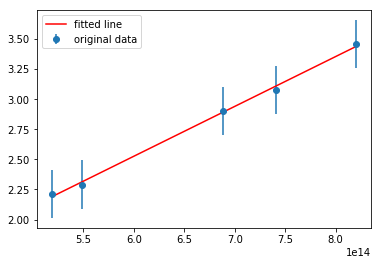

In [7]:
#plt.plot(x, y, 'o', label='original data')
plt.errorbar(x, y,  yerr=0.2, fmt='o', label='original data')

plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

# Ajuste Manual

In [55]:
xm=np.array([0.0,  820.264]) * 1e12 # Thz
def plotManual(a,b):
    plt.plot(x, y, 'o', label='original data')#, autoscale_on=False, xlim=(0, 1e14), ylim=(0, 4))
    plt.axis([0, 10.0e14, 0.0, 4.0])   # [ymin, ymax, zmin, zmax]
    plt.plot(xm, a + b*1.0e-15*xm, 'r', label='fitted line')
    plt.grid('on')
    #plt.legend()
    plt.xlabel('Freq/Hz')
    plt.ylabel('Vs/V')
    plt.legend(loc='upper center')
    plt.show()

widgets.interact(plotManual,  a=(0.0,4.0,0.1), b=(2,4,0.1));